In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [3]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [4]:
y.shape, tx.shape

((10000,), (10000, 2))

# Computing the Cost Function
Fill in the the `compute_cost` function below:

In [5]:
def compute_loss(y, tx, w):
    """Calculate the loss"""

    e = y-tx.dot(w)
    #MSE
    return 1/(2*y.shape[0])*(np.transpose(e).dot(e)).sum()
    
    #MAE
    #return 1/(2*y.shape[0])*abs(e).sum()

In [6]:
w = np.array([[1],[2]])
print(compute_loss(y, tx, w))

261520557922.0


# Grid Search

Fill in the function `grid_search()` below:

In [7]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    
    #compute loss for each combination of w0 and w1
    for i in range(0,len(w0)):
        for j in range(0,len(w1)):
            losses[i,j] = compute_loss(y, tx, (w0[i],w1[j]))
            
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678249, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.011 seconds


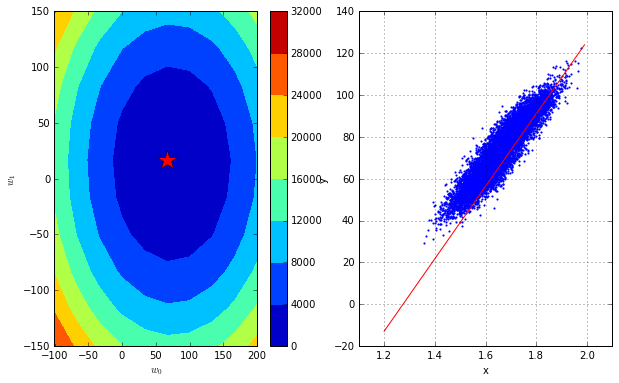

In [8]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization
import datetime

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [9]:
#a)
def compute_gradient(y, tx, w):
    """Compute the gradient and loss"""

    e = y-tx.dot(w)
    gradient = -1/y.shape[0] * np.transpose(tx).dot(e)
    
    # Value of the MSE loss (or cost) function
    loss = compute_loss(y, tx, w)
    
    return gradient, loss

In [10]:
#b)
w = np.matrix('100;20')
gradient, loss = compute_gradient(y, tx, w)
print(gradient)
w = np.matrix('50;10')
gradient, loss = compute_gradient(y, tx, w)
print(gradient)

(2, 10000)
[[-59.81967768 -23.68895452 -46.58434842 ...,  -8.32779473 -24.38901745
   -1.59669261]
 [ 10.          10.          10.         ...,  10.          10.          10.        ]]


Please fill in the functions `gradient_descent` below:

In [11]:
#c)
def gradient_descent(y, tx, initial_w, max_iters, gamma): 
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        
        # compute gradient and loss
        gradient, loss = compute_gradient(y, tx, w)
        
        # update w by gradient
        #w(t+1) = w(t) - gamma * gradient(w(t))
        w = w - gamma * gradient
        
        # store w and loss
        ws.append(np.copy(w))
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [12]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 100 # (default: 50)
gamma = 0.1 #(default: 0.4), 0.001, 0.01, 0.5, 1, 2, 2.5


# Initialization
w_initial = np.array([0.0, 0.0])
# for w_0 = 0, w_1 = 0, it converges to loss = 15  (40/49) --> quick enough !
# for w_0 = 100, w_1 = 10, it converges faster to loss = 15 (31/49) --> quick enough !
# for w_0 = -1000, w_1 = 1000, it converges to loss = 50 (49/49) --> too slow !


# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/99): loss=2792.236712759167, w0=7.329392200210504, w1=1.3479712434989137
Gradient Descent(1/99): loss=2264.635056030004, w0=13.925845180399968, w1=2.561145362647917
Gradient Descent(2/99): loss=1837.2777140793817, w0=19.86265286257048, w1=3.6530020698820245
Gradient Descent(3/99): loss=1491.1182670993771, w0=25.205779776523947, w1=4.635673106392713
Gradient Descent(4/99): loss=1210.729115045573, w0=30.014593999082074, w1=5.520077039252335
Gradient Descent(5/99): loss=983.613901881992, w0=34.34252679938438, w1=6.316040578825998
Gradient Descent(6/99): loss=799.6505792194913, w0=38.23766631965647, w1=7.032407764442294
Gradient Descent(7/99): loss=650.6402878628652, w0=41.743291887901336, w1=7.67713823149696
Gradient Descent(8/99): loss=529.9419518639986, w0=44.89835489932172, w1=8.257395651846164
Gradient Descent(9/99): loss=432.1762997049167, w0=47.73791160960007, w1=8.779627330160444
Gradient Descent(10/99): loss=352.98612145606006, w0=50.29351264885058, w1=9.2496358

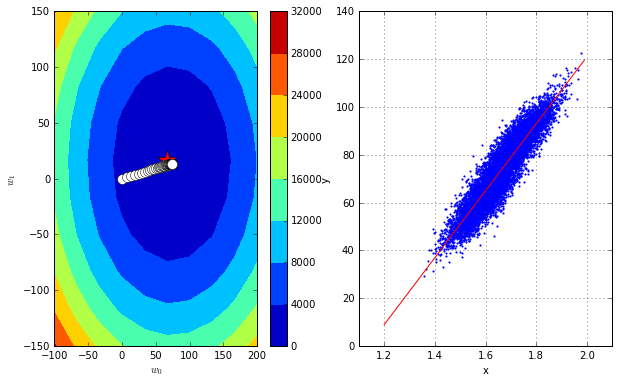

In [13]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# Stochastic gradient descent

In [14]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient for batch data."""    
    # Implement stochastic gradient computation.It's same as the gradient descent.
    # Gradient of MSE loss (or cost) function is: 1/N transpose(X-tilde)*e
    e = y-tx.dot(w)
    gradient = -1/y.shape[0] * np.transpose(tx).dot(e)
    
    # Value of the MSE loss (or cost) function
    loss = compute_loss(y, tx, w)
    
    return gradient, loss


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_epochs, gamma):
    """Stochastic gradient descent algorithm."""    
    # Implement stochastic gradient descent.
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    max_iters = max_epochs

    for n_iter in range(max_iters):      
        for y_n, tx_n in batch_iter(y, tx, batch_size, True):
            gradient, loss = compute_stoch_gradient(y_n, tx_n, w)
            w = w - gamma * gradient
            
            # store w and loss
            ws.append(np.copy(w))
            losses.append(loss)

            print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    
    return losses, ws

In [15]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4
batch_size = 1

# Initialization
w_initial = np.array([0.0, 0.0])

# Start SGD.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=3854.429514168868, w0=35.12004334470614, w1=7.2745481551351325
Gradient Descent(1/49): loss=1267.6429310166848, w0=55.260692240045614, w1=25.553833417736925
Gradient Descent(2/49): loss=326.9297127817974, w0=65.48896228390812, w1=18.700412894731475
Gradient Descent(3/49): loss=50.58794119138165, w0=69.51241120010454, w1=14.586328092227388
Gradient Descent(4/49): loss=62.01724316880811, w0=73.96724204021717, w1=16.433613582732843
Gradient Descent(5/49): loss=4.561013123640796, w0=72.75913434652217, w1=16.57614890677364
Gradient Descent(6/49): loss=3.1201580025095588, w0=73.75835932659577, w1=16.160051020666604
Gradient Descent(7/49): loss=109.02560266446332, w0=79.66498212246044, w1=3.9384544585294243
Gradient Descent(8/49): loss=112.13960268224778, w0=73.67460042691555, w1=5.617390974760668
Gradient Descent(9/49): loss=38.696240682967854, w0=77.1935202922364, w1=10.287543013219434
Gradient Descent(10/49): loss=64.90635008704248, w0=72.63610523237477, w1=15.

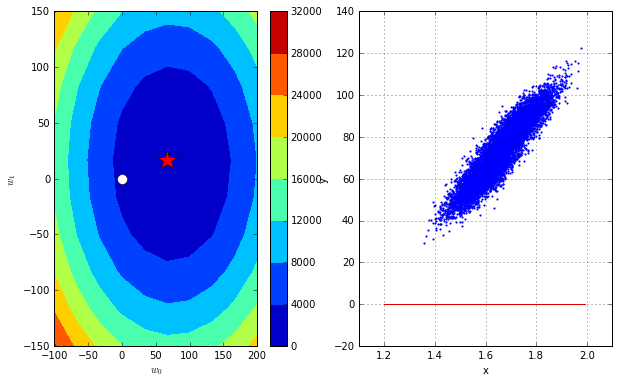

In [16]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))